Head of math_train_data.csv:
  Gender Religion Branch  Roll-1  Roll-2  Roll-3  Math-1 Theory  \
0      M    Hindu     CE     350     288     176             47   
1      F    Hindu    CST      18      23      16             84   
2      F    Hindu   AIML      23       3       8             74   
3      M    Hindu    CST     212     140      81             55   
4      M    Hindu    CST     208     323     195             38   

   Physics Theory  Physics Practical  Java-1 Theory  ...  Java-1 Attendance  \
0              48                 75             50  ...              97.00   
1              83                 81             61  ...              88.79   
2              85                 86             64  ...              97.98   
3              69                 82             56  ...              96.23   
4              59                 74             36  ...              97.92   

   Software Engineering Attendance  Environmental Science Attendance  \
0                    

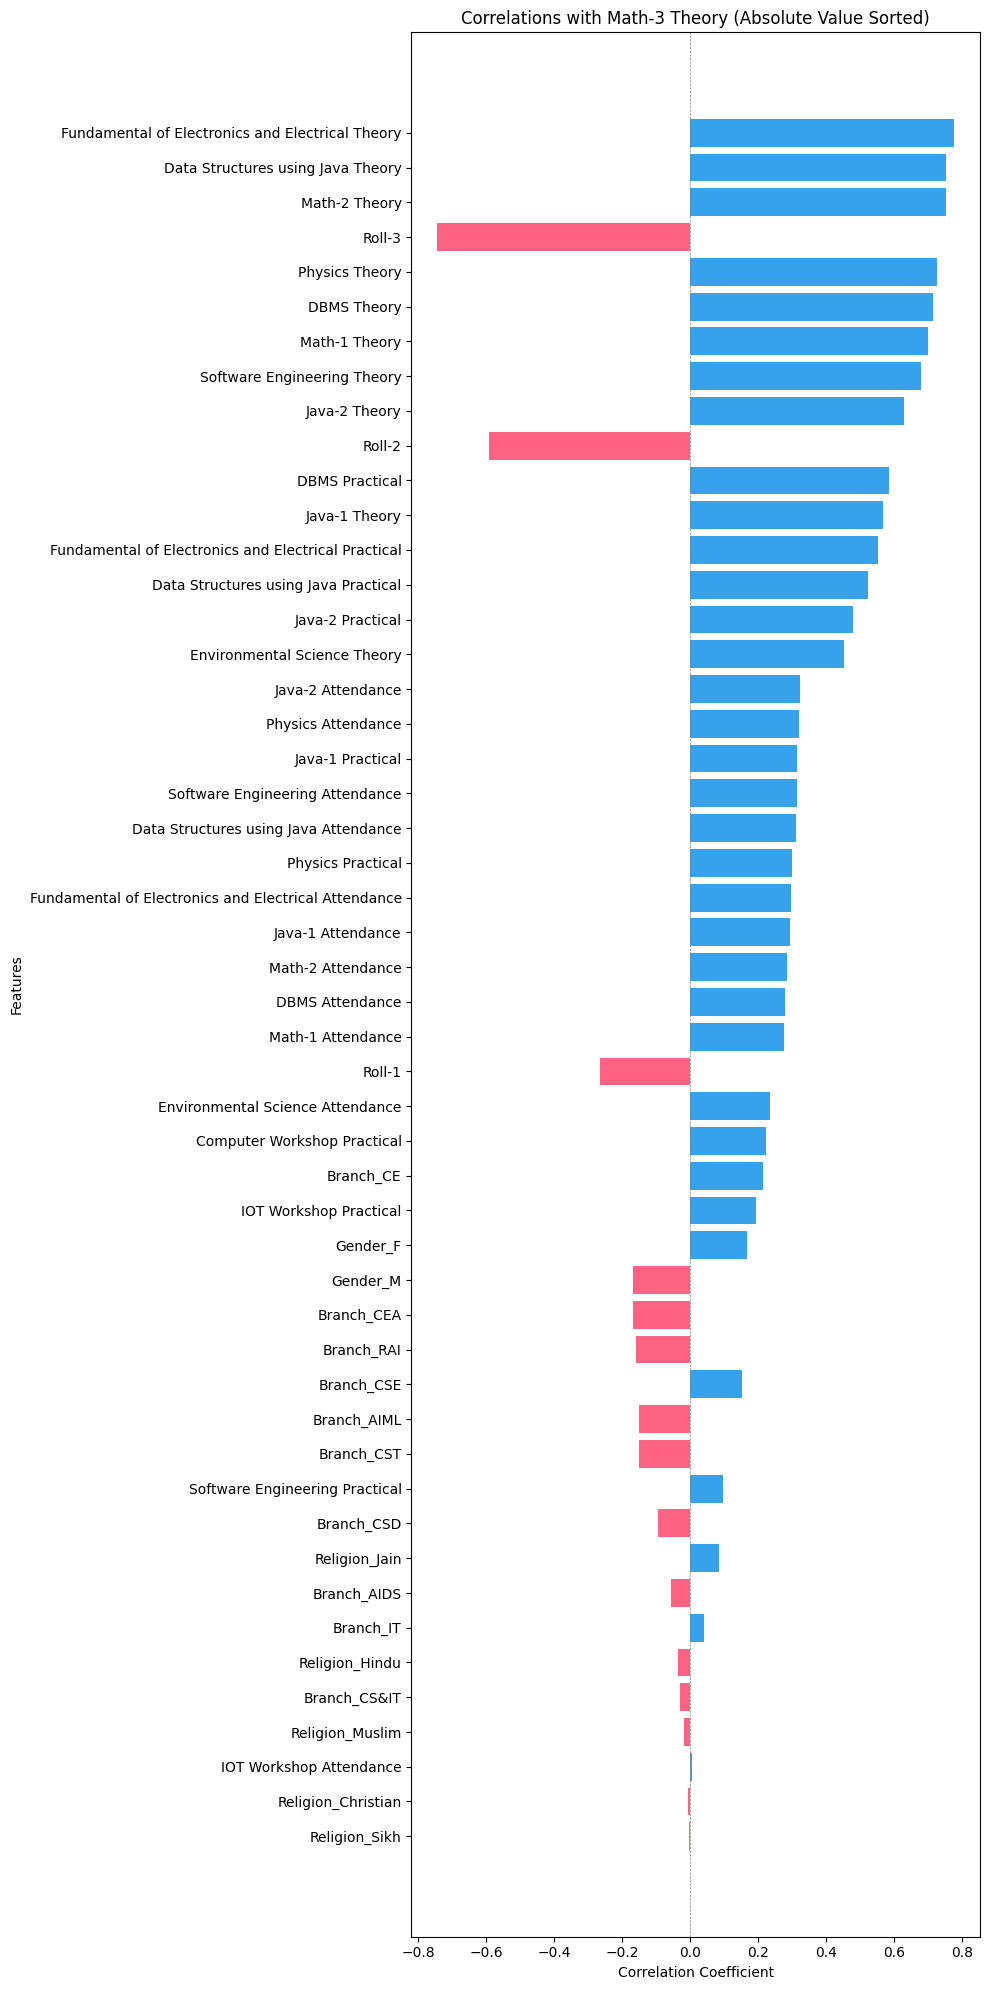

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the math train data
df = pd.read_csv('math_train_data.csv')

# Print the first 5 rows
print("Head of math_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with Math-3 Theory
for col in numeric_cols:
    if col != 'Math-3 Theory':  # Exclude the target itself
        corr = df[col].corr(df['Math-3 Theory'])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch']:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df['Math-3 Theory'])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if 'Roll-1' in df.columns:
    corr = df['Roll-1'].astype(float).corr(df['Math-3 Theory'])
    correlations['Roll-1'] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print sorted correlations
print("\nCorrelations with Math-3 Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, max(8, len(labels) * 0.4)))  # Adjust height based on number of features
plt.barh(labels[::-1], values[::-1], color=np.where(np.array(values[::-1]) >= 0, '#36A2EB', '#FF6384'))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlations with Math-3 Theory (Absolute Value Sorted)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of math_train_data.csv:
  Gender Religion Branch  Roll-1  Roll-2  Roll-3  Math-1 Theory  \
0      M    Hindu     CE     350     288     176             47   
1      F    Hindu    CST      18      23      16             84   
2      F    Hindu   AIML      23       3       8             74   
3      M    Hindu    CST     212     140      81             55   
4      M    Hindu    CST     208     323     195             38   

   Physics Theory  Physics Practical  Java-1 Theory  ...  Java-1 Attendance  \
0              48                 75             50  ...              97.00   
1              83                 81             61  ...              88.79   
2              85                 86             64  ...              97.98   
3              69                 82             56  ...              96.23   
4              59                 74             36  ...              97.92   

   Software Engineering Attendance  Environmental Science Attendance  \
0                    

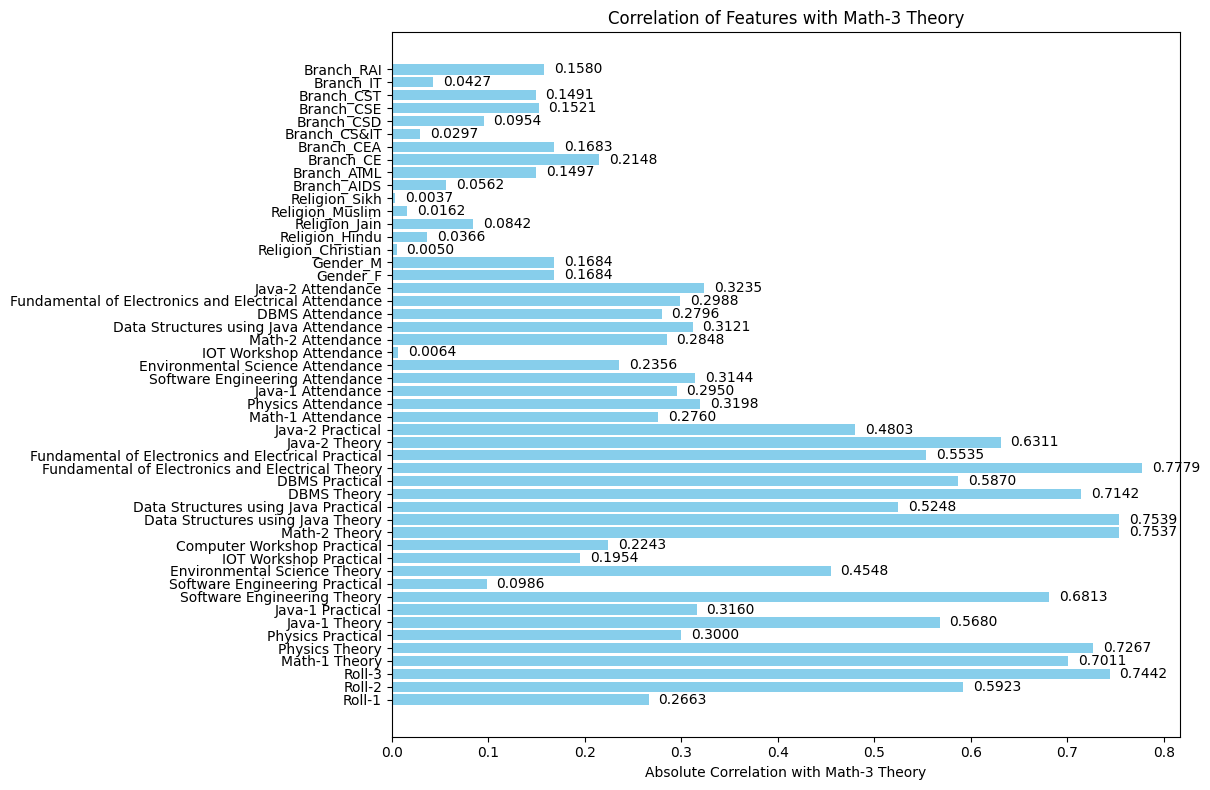

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots display inline in Jupyter Notebook
%matplotlib inline

# Read the math train data
df = pd.read_csv('math_train_data.csv')

# Print the first 5 rows
print("Head of math_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame for correlation calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch']:
        encoded = pd.get_dummies(df[col], prefix=col)
        df_encoded = pd.concat([df_encoded, encoded], axis=1)
        df_encoded = df_encoded.drop(columns=[col])

# 1. Create dictionary of absolute correlations with Math-3 Theory
correlations_with_math = {}
for col in df_encoded.columns:
    if col != 'Math-3 Theory':  # Exclude the target itself
        corr = abs(df_encoded[col].corr(df_encoded['Math-3 Theory']))
        correlations_with_math[col] = corr

# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with Math-3 Theory:")
for col, corr in sorted(correlations_with_math.items(), key=lambda x: x[1], reverse=True):
    print(f"{col}: {corr:.4f}")

# 2. Compute pairwise correlations between all columns
corr_matrix = df_encoded.corr().abs()  # Absolute correlations

# Initialize list of columns to drop
columns_to_drop = []

# Check for pairs with correlation > 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] > 0.9 and col1 != 'Math-3 Theory' and col2 != 'Math-3 Theory':
            # Compare correlations with Math-3 Theory
            corr1 = correlations_with_math.get(col1, 0)
            corr2 = correlations_with_math.get(col2, 0)
            # Drop the column with lower correlation with Math-3 Theory
            if corr1 < corr2:
                columns_to_drop.append(col1)
            else:
                columns_to_drop.append(col2)

# Remove duplicates from columns_to_drop
columns_to_drop = list(set(columns_to_drop))
print("\nColumns to drop due to high correlation (> 0.9):")
print(columns_to_drop if columns_to_drop else "No columns with correlation > 0.9")

# Create reduced DataFrame (optional, not saved unless needed)
df_reduced = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# 3. Plot correlations as a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(list(correlations_with_math.keys()), 
                [corr for corr in correlations_with_math.values()], 
                color='skyblue')
plt.xlabel('Absolute Correlation with Math-3 Theory')
plt.title('Correlation of Features with Math-3 Theory')
plt.tight_layout()

# Add correlation values on the bars
for bar, corr in zip(bars, correlations_with_math.values()):
    width = bar.get_width()
    plt.text(x=width + 0.01, y=bar.get_y() + bar.get_height()/2, s=f'{corr:.4f}', 
             ha='left', va='center')

# Display the plot in the notebook
plt.show()

# Multiple Linear Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Load the dataset
df = pd.read_csv("math_train_data.csv")

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch"], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression")
print("Approach: Full-feature multivariate regression with 5-Fold Cross-Validation and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame([{
    "Model": "Multiple Linear Regression",
    "Approach": "5-Fold CV + one-hot encoding",
    "MAE": round(mean_mae, 4)
}])

# Append to CSV or create if it doesn't exist
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)


Model: Multiple Linear Regression
Approach: Full-feature multivariate regression with 5-Fold Cross-Validation and one-hot encoding
MAE: 6.6868


# Polynomial Regression

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("math_train_data.csv")

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch"], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'
feature_cols = [col for col in df_encoded.columns if col != target_col]
X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print("Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 2)",
    "Approach": "5-Fold CV + one-hot encoding + degree 2",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 2)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding
MAE: 32.9644


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("math_train_data.csv")

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch"], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'
feature_cols = [col for col in df_encoded.columns if col != target_col]
X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 3)",
    "Approach": "5-Fold CV + one-hot encoding + degree 3",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 3)
Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV and one-hot encoding
MAE: 15.1354


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("math_train_data.csv")

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch"], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'
feature_cols = [col for col in df_encoded.columns if col != target_col]
X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding
MAE: 14.4570


# Random forest regressor

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ["Gender", "Religion", "Branch"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        # FIX: Added handle_unknown='ignore' to gracefully handle categories
        # present in validation folds but not in training folds.
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define model pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42)),
    ]
)

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Suppress specific sklearn warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
    neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Random Forest Regressor")
print("Approach: Full-feature regression with 5-Fold CV and OneHotEncoding")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor(tuned)",
            "Approach": "Full-feature regression with 5-Fold CV and OneHotEncoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"

results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 6.9003


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the model pipeline with tuned hyperparameters
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='sqrt',
        max_depth=20,
        random_state=42
    ))
])

# Use 5-Fold CV for evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
      "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
                "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.8788


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import os

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'regressor__n_estimators': [100, 200, 500, 1000],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}


# Use 5-Fold CV for tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_absolute_error',
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X, y)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert back from neg MAE to MAE

# Print results to terminal
print("Model: Random Forest Regressor(tuned)")
print("Parameters:", best_params)
print(f"MAE: {best_score:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": best_params,
    "MAE": round(best_score, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor(tuned)
Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}
MAE: 6.8679


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the model pipeline with updated hyperparameters
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.5,  # Percentage of features to consider at each split
        max_depth=30,
        random_state=42
    ))
])

# Use 5-Fold CV for evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 10, "
      "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': 30}")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 1000, 'regressor__min_samples_split': 10, "
                "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': 30}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': 30}
MAE: 6.8118


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Handle outliers in target using IQR
target_col = 'Math-3 Theory'
Q1, Q3 = df[target_col].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[~((df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR))]

# Define target and features
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline with scaling for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Optimized parameter grid for RandomizedSearchCV
param_distributions = {
    'regressor__n_estimators': [100, 200, 500],  # Lower values for faster training
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 3],
    'regressor__max_features': ['sqrt', 0.5, None]  # Reduced options
}

# Use 5-Fold CV for tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=25,  # Reduced iterations
    scoring='neg_mean_absolute_error',
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X, y)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert to MAE

# Feature importance for selection
feature_importances = best_model.named_steps['regressor'].feature_importances_
feature_names = (best_model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_cols)
                 .tolist() + numeric_cols)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("Feature Importances:\n", importance_df.sort_values(by='Importance', ascending=False))

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor(tuned)",
    "Approach": best_params,
    "MAE": round(best_score, 4)
}])
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

# Print results
print("Model: Random Forest Regressor(tuned)")
print("Approach:", best_params)
print(f"MAE: {best_score:.4f}")


Feature Importances:
                                               Feature  Importance
32   Fundamental of Electronics and Electrical Theory    0.212751
27                                      Math-2 Theory    0.186891
16                                             Roll-3    0.150379
28                  Data Structures using Java Theory    0.104658
18                                     Physics Theory    0.085254
17                                      Math-1 Theory    0.037795
30                                        DBMS Theory    0.036356
22                        Software Engineering Theory    0.015847
15                                             Roll-2    0.010272
33  Fundamental of Electronics and Electrical Prac...    0.009237
46                                  Java-2 Attendance    0.008794
39                    Software Engineering Attendance    0.008522
34                                      Java-2 Theory    0.008443
24                       Environmental Science Theory 

# XGBoost

In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define XGBoost model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: XGBoost Regressor")
print("Approach: Full-feature regression with 5-Fold CV and OneHotEncoding")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "XGBoost Regressor",
    "Approach": "Full-feature regression with 5-Fold CV and OneHotEncoding",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: XGBoost Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 7.4798


# LightGBM

In [13]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings  # For suppressing warnings
import os

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define LightGBM model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42))
])

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: LightGBM Regressor")
print("Approach: Full-feature regression with 5-Fold CV and OneHotEncoding")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "LightGBM Regressor",
    "Approach": "Full-feature regression with 5-Fold CV and OneHotEncoding",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 579, number of used features: 41
[LightGBM] [Info] Start training from score 65.122625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

# Ridge Lasso

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)  # Standardize numeric features
    ]
)

# Initialize Ridge and Lasso regressors
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Alpha is the regularization strength
])

lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Alpha is the regularization strength
])

# Use 5-Fold CV with negative MAE for Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_neg_mae_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)

# Use 5-Fold CV with negative MAE for Lasso
lasso_neg_mae_scores = cross_val_score(lasso_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
lasso_mae_scores = -lasso_neg_mae_scores
lasso_mean_mae = np.mean(lasso_mae_scores)

# Print results to terminal
print("Model: Ridge Regression")
print("Approach: Full-feature regression with 5-Fold CV and Regularization")
print(f"MAE: {ridge_mean_mae:.4f}")

print("\nModel: Lasso Regression")
print("Approach: Full-feature regression with 5-Fold CV and Regularization")
print(f"MAE: {lasso_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([
    {
        "Model": "Ridge Regression",
        "Approach": "Full-feature regression with 5-Fold CV and Regularization",
        "MAE": round(ridge_mean_mae, 4)
    },
    {
        "Model": "Lasso Regression",
        "Approach": "Full-feature regression with 5-Fold CV and Regularization",
        "MAE": round(lasso_mean_mae, 4)
    }
])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Ridge Regression
Approach: Full-feature regression with 5-Fold CV and Regularization
MAE: 6.6820

Model: Lasso Regression
Approach: Full-feature regression with 5-Fold CV and Regularization
MAE: 6.6286


In [15]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("math_train_data.csv")

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Lasso pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))  # Ensure convergence
])

# Alpha values to try
alpha_grid = {'regressor__alpha': np.logspace(-3, 3, 20)}

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch for Ridge
ridge_search = GridSearchCV(ridge_pipeline, alpha_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True)
ridge_search.fit(X, y)
ridge_best_mae = -ridge_search.best_score_

# GridSearch for Lasso
lasso_search = GridSearchCV(lasso_pipeline, alpha_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True)
lasso_search.fit(X, y)
lasso_best_mae = -lasso_search.best_score_

# Print results
print("Model: Ridge Regression")
print("Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV")
print(f"Best Alpha: {ridge_search.best_params_['regressor__alpha']}")
print(f"MAE: {ridge_best_mae:.4f}")

print("\nModel: Lasso Regression")
print("Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV")
print(f"Best Alpha: {lasso_search.best_params_['regressor__alpha']}")
print(f"MAE: {lasso_best_mae:.4f}")

# Log results
results_df = pd.DataFrame([
    {
        "Model": "Ridge Regression(tuned)",
        "Approach": "Tuned regression with 5-Fold CV",
        "MAE": round(ridge_best_mae, 4)
    },
    {
        "Model": "Lasso Regression(tuned)",
        "Approach": "Tuned regression with 5-Fold CV",
        "MAE": round(lasso_best_mae, 4)
    }
], columns=["Model", "Approach", "MAE"])  
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)



Model: Ridge Regression
Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV
Best Alpha: 26.366508987303554
MAE: 6.6486

Model: Lasso Regression
Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV
Best Alpha: 0.07847599703514611
MAE: 6.6276
